## EDA of California Housing Dataset:

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.datasets import fetch_openml
housing = fetch_openml(name = 'house_prices', as_frame = True)
df = housing['data']
df['SalePrice'] = housing['target']

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1.0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,2.0,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,3.0,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,4.0,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,5.0,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


In [4]:
df.shape

(1460, 81)

In [5]:
df['Id'].describe

<bound method NDFrame.describe of 0          1.0
1          2.0
2          3.0
3          4.0
4          5.0
         ...  
1455    1456.0
1456    1457.0
1457    1458.0
1458    1459.0
1459    1460.0
Name: Id, Length: 1460, dtype: float64>

### Data Pruning
The Id column is only a serial number, so we will drop it.

In [6]:
df.drop('Id', axis = 1, inplace = True)
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60.0,RL,65.0,8450.0,Pave,None,Reg,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,2.0,2008.0,WD,Normal,208500.0
1,20.0,RL,80.0,9600.0,Pave,None,Reg,Lvl,AllPub,FR2,...,0.0,None,None,None,0.0,5.0,2007.0,WD,Normal,181500.0
2,60.0,RL,68.0,11250.0,Pave,None,IR1,Lvl,AllPub,Inside,...,0.0,None,None,None,0.0,9.0,2008.0,WD,Normal,223500.0
3,70.0,RL,60.0,9550.0,Pave,None,IR1,Lvl,AllPub,Corner,...,0.0,None,None,None,0.0,2.0,2006.0,WD,Abnorml,140000.0
4,60.0,RL,84.0,14260.0,Pave,None,IR1,Lvl,AllPub,FR2,...,0.0,None,None,None,0.0,12.0,2008.0,WD,Normal,250000.0


### Seperating Numerical & Categorical Variables

In [7]:
df_num = [num for num in df.columns if df[num].dtype != 'O']
df_cat = [cat for cat in df.columns if df[cat].dtype == 'O']

In [8]:
print('The number of numerical features are: {}'.format(len(df_num)))
print('The number of categorical features are: {}'.format(len(df_cat)))

The number of numerical features are: 37
The number of categorical features are: 43


In [9]:
dfNum = df[df_num]
dfCat = df[df_cat]

In [10]:
dfNum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [11]:
dfCat.head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
1,RL,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
2,RL,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal
3,RL,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,None,None,None,WD,Abnorml
4,RL,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,None,None,None,WD,Normal


We have seperated the numerical and categorical features to be used in our EDA.

## Missing Values:

In [12]:
df.isna().sum()

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

#### Top 10 features with missing values

In [13]:
# top 10 missing values
df.isna().sum().sort_values(ascending=False)[0:10]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
dtype: int64

In [14]:
# Porportation of the data missing in a feature
(df.isna().sum().sort_values(ascending=False)[0:15])/df.shape[0]

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageCond      0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtCond        0.025342
BsmtQual        0.025342
dtype: float64

### Dealing with missing values:


#### As the number of features in this dataset is very large, we can be a bit liberal with the available features.

- We will drop any features with with missing value > 45%.
- We will impute any feature with missing value < 45%.

In [15]:
# list comprehension to drop columns
drop_list = [feature for feature in df.columns if (df[feature].isna().sum())/df.shape[0] >= 0.45 ]
drop_list

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

We will have to drop these columns from:
- Main dataframe df
- Derived numerical dataframe dfNum
- Derived categorical dataframe dfCat

Or we can create new numerical & categorical dataframes

In [16]:
df.drop(drop_list, axis = 1, inplace = True)

df_num = [num for num in df.columns if df[num].dtype != 'O']
df_cat = [cat for cat in df.columns if df[cat].dtype == 'O']
dfNum = df[df_num]
dfCat = df[df_cat]
print('The number of numerical features are: {}'.format(len(df_num)))
print('The number of categorical features are: {}'.format(len(df_cat)))

The number of numerical features are: 37
The number of categorical features are: 38


In [17]:
dfNum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,0.0,...,0.0,61.0,0.0,0.0,0.0,0.0,0.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,0.0,...,298.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,0.0,...,0.0,42.0,0.0,0.0,0.0,0.0,0.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,0.0,...,0.0,35.0,272.0,0.0,0.0,0.0,0.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,0.0,...,192.0,84.0,0.0,0.0,0.0,0.0,0.0,12.0,2008.0,250000.0


In [18]:
dfCat.head()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


#### Result:
We were able to:
- Drop the features which are having more than 45% missing values.
- Seperate the categorical & numerical variables

## Data Exploration:

#### Data exploration in categorical features 

In [19]:
# For categorical features we will see the value counts of different categories in each feature:

for col in df_cat:
    print(df[col].value_counts(normalize=True) * 100)
    print('---------------------------')

RL         78.835616
RM         14.931507
FV          4.452055
RH          1.095890
C (all)     0.684932
Name: MSZoning, dtype: float64
---------------------------
Pave    99.589041
Grvl     0.410959
Name: Street, dtype: float64
---------------------------
Reg    63.356164
IR1    33.150685
IR2     2.808219
IR3     0.684932
Name: LotShape, dtype: float64
---------------------------
Lvl    89.794521
Bnk     4.315068
HLS     3.424658
Low     2.465753
Name: LandContour, dtype: float64
---------------------------
AllPub    99.931507
NoSeWa     0.068493
Name: Utilities, dtype: float64
---------------------------
Inside     72.054795
Corner     18.013699
CulDSac     6.438356
FR2         3.219178
FR3         0.273973
Name: LotConfig, dtype: float64
---------------------------
Gtl    94.657534
Mod     4.452055
Sev     0.890411
Name: LandSlope, dtype: float64
---------------------------
NAmes      15.410959
CollgCr    10.273973
OldTown     7.739726
Edwards     6.849315
Somerst     5.890411
Gilbe

In [20]:
df['RoofMatl'].value_counts(normalize=True) * 100

CompShg    98.219178
Tar&Grv     0.753425
WdShngl     0.410959
WdShake     0.342466
Metal       0.068493
Membran     0.068493
Roll        0.068493
ClyTile     0.068493
Name: RoofMatl, dtype: float64

In [21]:
(df['RoofMatl'].value_counts(normalize=True) * 100)[0]

98.21917808219179

From above its clear that we can access the feature with the highest % of prevalence.

##### Now, we should drop the columns/features where a category is occuring more than 80% of the time. As this will distort the data and the analysis would be useless because of the dominance of the category.

#### Droping Categorical feature with a > 80% occurance category:

In [22]:
cat_drop = [feature for feature in dfCat.columns if (df[feature].value_counts(normalize=True) * 100)[0] >= 80]
print('The number of features with a category occurance > 80% is : {} features'.format(len(cat_drop)))
cat_drop

The number of features with a category occurance > 80% is : 20 features


['Street',
 'LandContour',
 'Utilities',
 'LandSlope',
 'Condition1',
 'Condition2',
 'BldgType',
 'RoofMatl',
 'ExterCond',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [23]:
# dropping the above features:
dfCat.drop(cat_drop, axis = 1, inplace = True)

dfCat.head()

,MSZoning,LotShape,LotConfig,Neighborhood,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,KitchenQual,GarageType,GarageFinish
0,RL,Reg,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,No,GLQ,Ex,Gd,Attchd,RFn
1,RL,Reg,FR2,Veenker,1Story,Gable,MetalSd,MetalSd,None,TA,CBlock,Gd,Gd,ALQ,Ex,TA,Attchd,RFn
2,RL,IR1,Inside,CollgCr,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Mn,GLQ,Ex,Gd,Attchd,RFn
3,RL,IR1,Corner,Crawfor,2Story,Gable,Wd Sdng,Wd Shng,None,TA,BrkTil,TA,No,ALQ,Gd,Gd,Detchd,Unf
4,RL,IR1,FR2,NoRidge,2Story,Gable,VinylSd,VinylSd,BrkFace,Gd,PConc,Gd,Av,GLQ,Ex,Gd,Attchd,RFn


### Result: 
- We have dropped 20 of the redundant categorical features out of 38.
- The categorical features have halfed. It will help in analysis.

### Data exploration of Numerical Features:

In [24]:
dfNum.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [25]:
dfNum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   float64
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   float64
 3   OverallQual    1460 non-null   float64
 4   OverallCond    1460 non-null   float64
 5   YearBuilt      1460 non-null   float64
 6   YearRemodAdd   1460 non-null   float64
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   float64
 9   BsmtFinSF2     1460 non-null   float64
 10  BsmtUnfSF      1460 non-null   float64
 11  TotalBsmtSF    1460 non-null   float64
 12  1stFlrSF       1460 non-null   float64
 13  2ndFlrSF       1460 non-null   float64
 14  LowQualFinSF   1460 non-null   float64
 15  GrLivArea      1460 non-null   float64
 16  BsmtFullBath   1460 non-null   float64
 17  BsmtHalfBath   1460 non-null   float64
 18  FullBath

 ### Univariate Analysis:
 
 
 #### Univariate Analysis of Numerical Features:

In [26]:
# We will perform the univariate analysis in four parts

dfNum1 = dfNum.iloc[:, 0:13]
dfNum2 = dfNum.iloc[:, 13:26]
dfNum3 = dfNum.iloc[:, 26:]

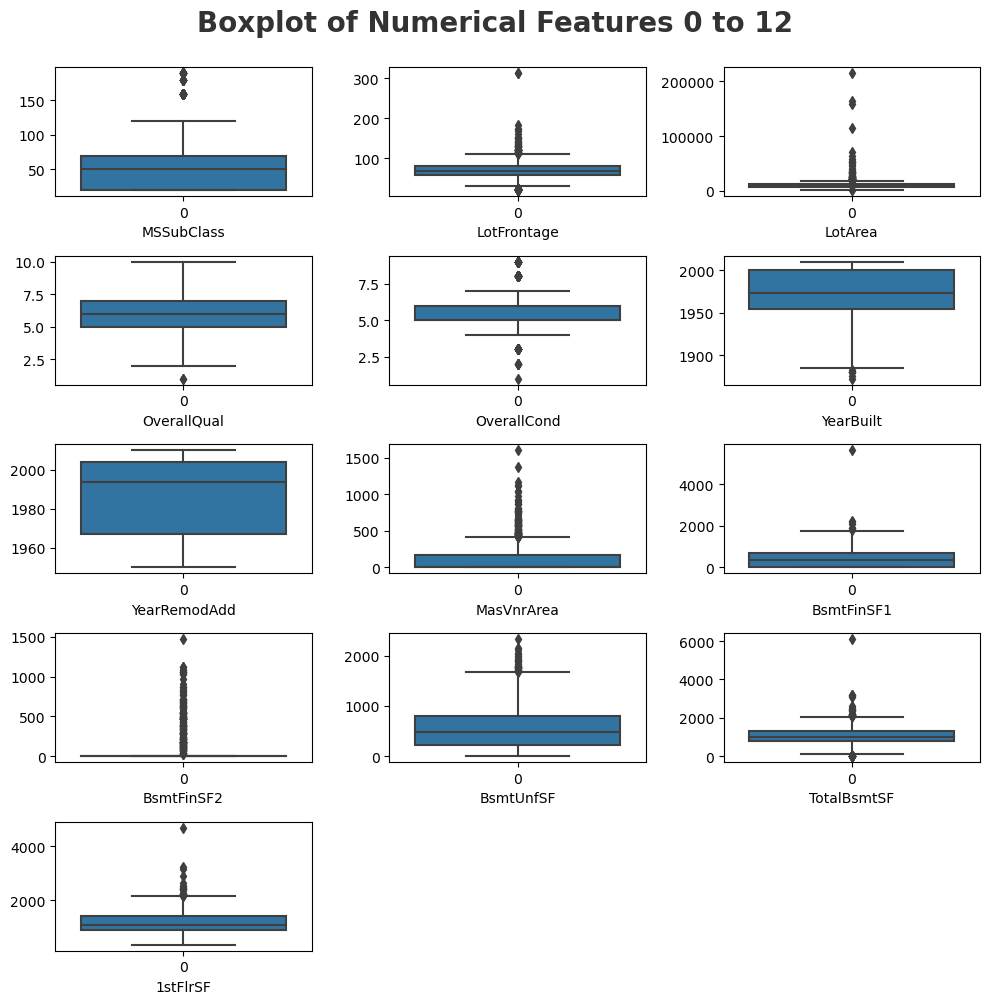

In [27]:
plt.figure(figsize=(10, 10))
plt.suptitle('Boxplot of Numerical Features 0 to 12', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, 13):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=dfNum1.iloc[:, i])
    plt.xlabel(dfNum1.columns[i])
    plt.tight_layout()

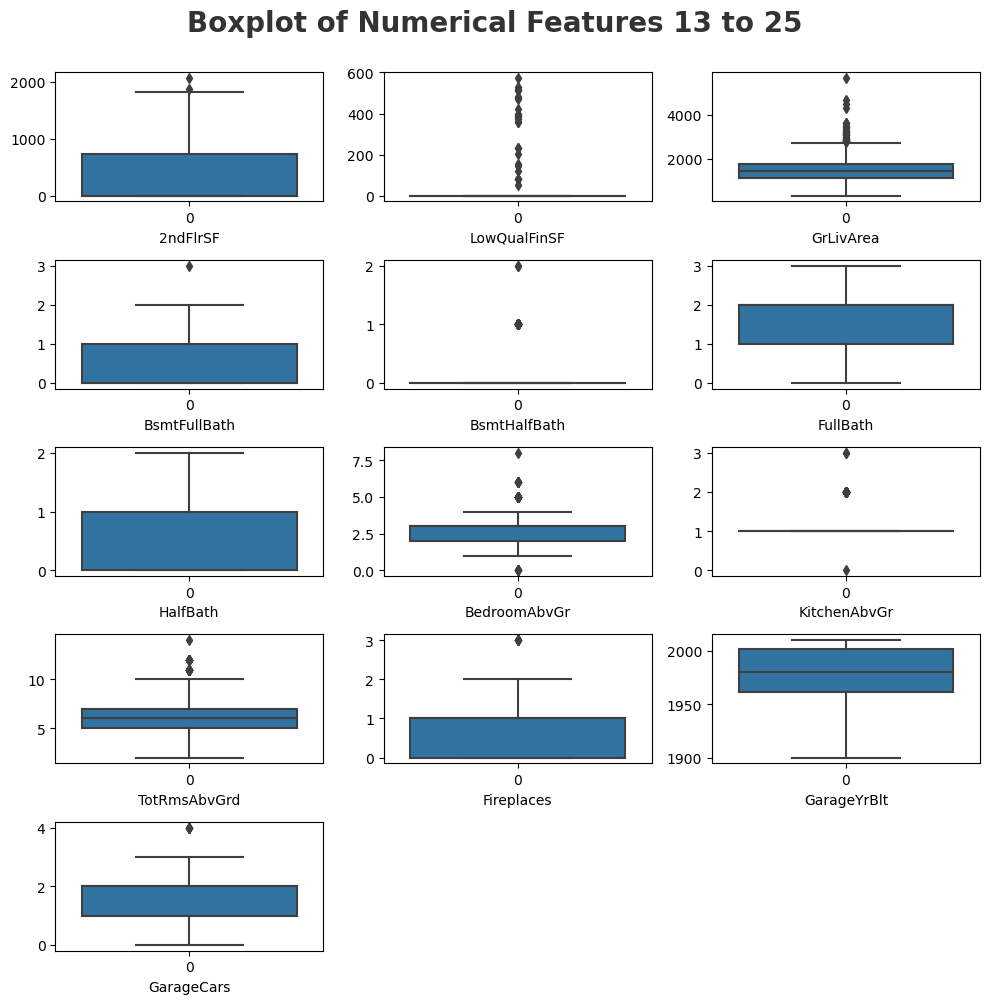

In [28]:
plt.figure(figsize=(10, 10))
plt.suptitle('Boxplot of Numerical Features 13 to 25', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, 13):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=dfNum2.iloc[:, i])
    plt.xlabel(dfNum2.columns[i])
    plt.tight_layout()

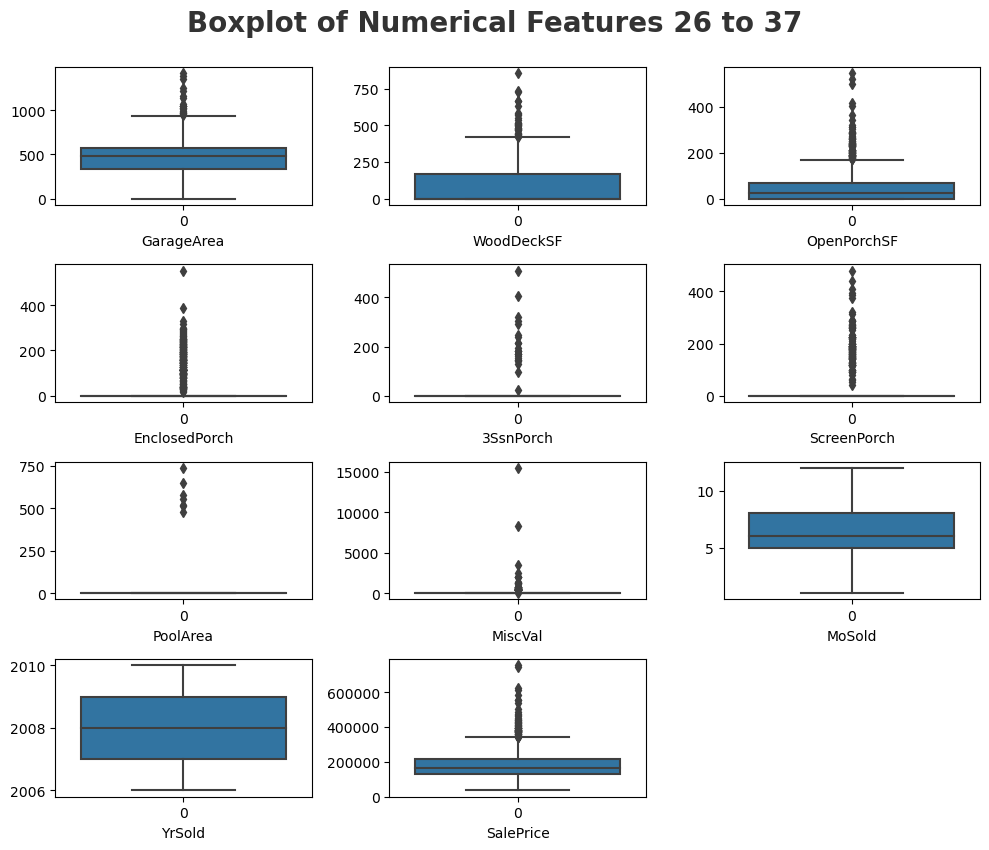

In [29]:
plt.figure(figsize=(10, 10))
plt.suptitle('Boxplot of Numerical Features 26 to 37', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, 11):
    plt.subplot(5, 3, i+1)
    sns.boxplot(data=dfNum3.iloc[:, i])
    plt.xlabel(dfNum3.columns[i])
    plt.tight_layout()

### Result:

There are multiple numerical features with a zero median value. All these features denote physical quantities of measurement which would always be > 0.

A median of zero means that the feature is fully filled with outliers only. 

##### Hence the features with zero median values could be dropped.

### Extracting features in Numerical columns having a zero median Value:

In [31]:
num_drop = [feature for feature in dfNum.columns if dfNum[feature].median() == 0]

print('The number of numerical features with a zero median value are: {} numbers'.format(len(num_drop)))
num_drop

The number of numerical features with a zero median value are: 13 numbers


['MasVnrArea',
 'BsmtFinSF2',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'HalfBath',
 'WoodDeckSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

#### Dropping the numerical columns with zero median values:


In [32]:
dfNum.drop(num_drop, axis = 1, inplace = True)
dfNum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,150.0,856.0,...,1.0,8.0,0.0,2003.0,2.0,548.0,61.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,284.0,1262.0,...,1.0,6.0,1.0,1976.0,2.0,460.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,434.0,920.0,...,1.0,6.0,1.0,2001.0,2.0,608.0,42.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,540.0,756.0,...,1.0,7.0,1.0,1998.0,3.0,642.0,35.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,490.0,1145.0,...,1.0,9.0,1.0,2000.0,3.0,836.0,84.0,12.0,2008.0,250000.0


### Result: 
- We have dropped 13 of the redundant numerical features out of 37.
- A combined of categorrical and numerical 20 + 13 = 33  out of 80 features i.e 41% have been dropped. It will help in analysis.

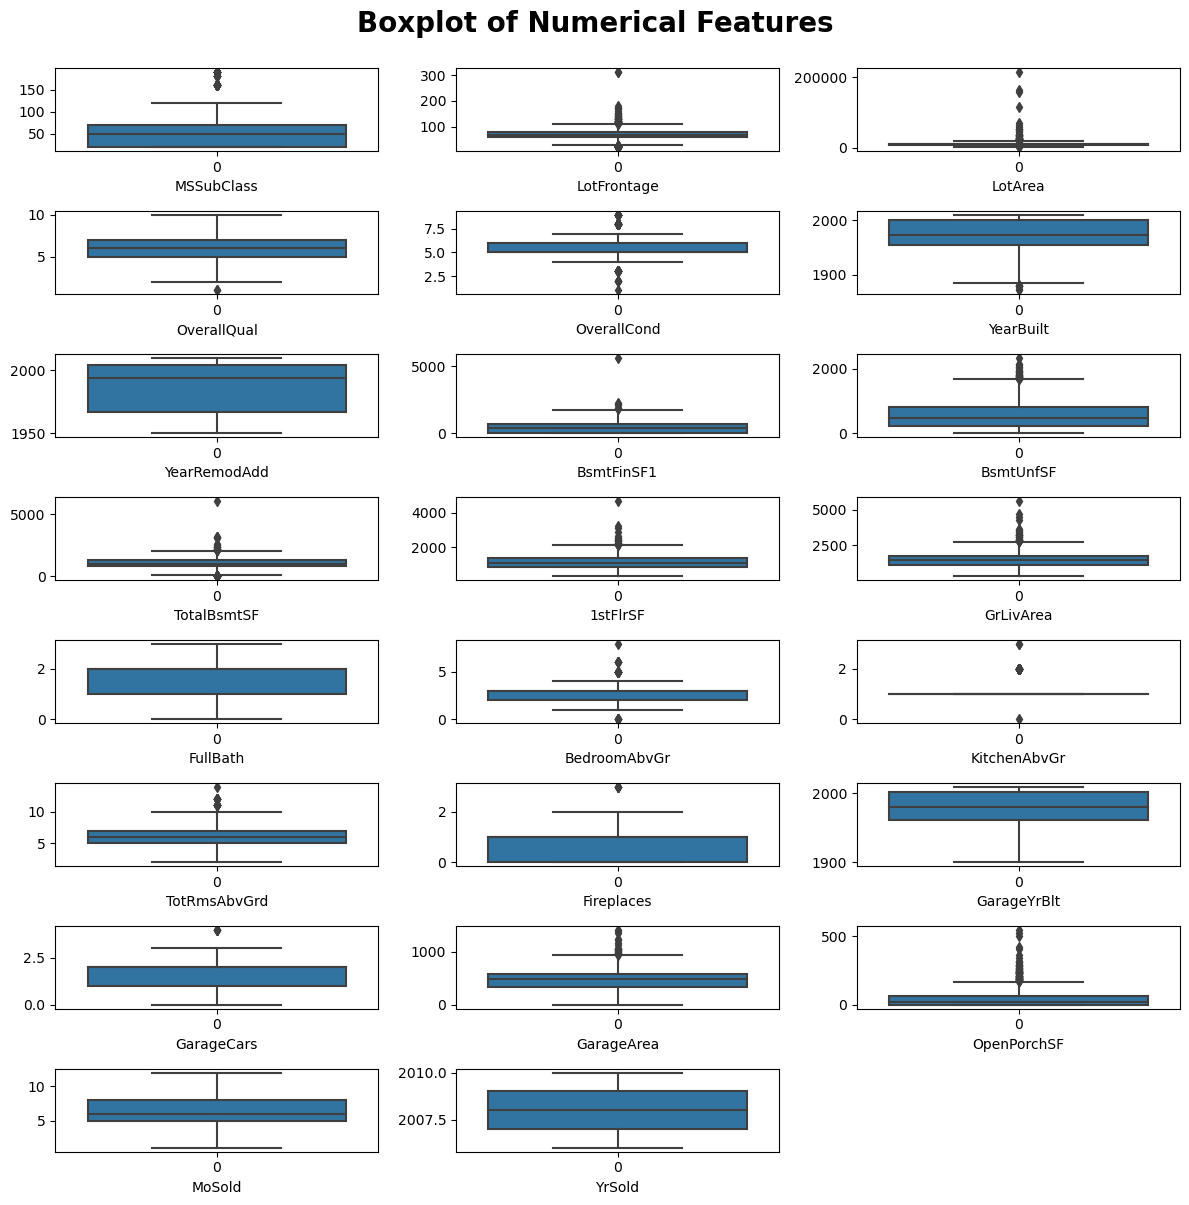

In [33]:
plt.figure(figsize=(12, 12))
plt.suptitle('Boxplot of Numerical Features', fontsize=20, fontweight='bold', y=1.)

for i in range(0, 23):
    plt.subplot(8, 3, i+1)
    sns.boxplot(data=dfNum.iloc[:, i])
    plt.xlabel(dfNum.columns[i])
    plt.tight_layout()

Features could be dropped based on IQR rather than median value. Which will further lower the number of features.

### Handling Missing Values & Outliers: 

##### Its quite obvious that the numerical features contain outliers. So lthey needs to be handled, but first we have to handle the missing values.

#### Handling Missing Values in Numerical & Categorical Features.

- In Numerical features we will impute the missing values with the median values.
- In categorical features we will impute the missing values with most frequent occuring category.

### Missing Values: Numerical features

In [34]:
dfNum.isna().sum()

MSSubClass        0
LotFrontage     259
LotArea           0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
BsmtFinSF1        0
BsmtUnfSF         0
TotalBsmtSF       0
1stFlrSF          0
GrLivArea         0
FullBath          0
BedroomAbvGr      0
KitchenAbvGr      0
TotRmsAbvGrd      0
Fireplaces        0
GarageYrBlt      81
GarageCars        0
GarageArea        0
OpenPorchSF       0
MoSold            0
YrSold            0
SalePrice         0
dtype: int64

In [35]:
dfNum = dfNum.fillna(df.median())
dfNum.isna().sum()

MSSubClass      0
LotFrontage     0
LotArea         0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
BsmtFinSF1      0
BsmtUnfSF       0
TotalBsmtSF     0
1stFlrSF        0
GrLivArea       0
FullBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
OpenPorchSF     0
MoSold          0
YrSold          0
SalePrice       0
dtype: int64

### Missing Values: Categorical features

In [36]:
dfCat.isna().sum()

MSZoning         0
LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrType       8
ExterQual        0
Foundation       0
BsmtQual        37
BsmtExposure    38
BsmtFinType1    37
HeatingQC        0
KitchenQual      0
GarageType      81
GarageFinish    81
dtype: int64

In [37]:
# Lets try to access the index of the most frequent class
print(dfCat['GarageType'].value_counts())
print('******')
print(dfCat['GarageType'].value_counts().index[0])

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64
******
Attchd


Its clear that we can access the most frequent class in this way. Now we have to apply this method to the whole categorical feature.

In [38]:
# Using Map Function
dfCat = dfCat.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [39]:
dfCat.isna().sum()

MSZoning        0
LotShape        0
LotConfig       0
Neighborhood    0
HouseStyle      0
RoofStyle       0
Exterior1st     0
Exterior2nd     0
MasVnrType      0
ExterQual       0
Foundation      0
BsmtQual        0
BsmtExposure    0
BsmtFinType1    0
HeatingQC       0
KitchenQual     0
GarageType      0
GarageFinish    0
dtype: int64

### Result:

###### We were able to fill the missing values in the numerical As well as the categorical features.

### Handling Outliers: 

#### Lets now handle the outliers in the numerical features: 

We will replace the upper outliers with upper limit and lower outliers with lower limit

In [44]:
# Making use of IQR:

def outlierClip(x):
    q1 = np.percentile(x, 25, interpolation = 'midpoint')
    q3 = np.percentile(x, 75, interpolation = 'midpoint')
    iqr = q3 - q1
    upper = q3 + 1.5* iqr
    lower = q1 - 1.5* iqr
    # using clip function
    x = x.clip(lower=lower, upper=upper)
    return x
    

In [45]:
dfNum = dfNum.apply(lambda x: outlierClip(x))

In [46]:
dfNum.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice
0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,150.0,856.0,...,1.0,8.0,0.0,2003.0,2.0,548.0,61.0,2.0,2008.0,208500.0
1,20.0,80.0,9600.0,6.0,7.5,1976.0,1976.0,978.0,284.0,1262.0,...,1.0,6.0,1.0,1976.0,2.0,460.0,0.0,5.0,2007.0,181500.0
2,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,434.0,920.0,...,1.0,6.0,1.0,2001.0,2.0,608.0,42.0,9.0,2008.0,223500.0
3,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,216.0,540.0,756.0,...,1.0,7.0,1.0,1998.0,3.0,642.0,35.0,2.0,2006.0,140000.0
4,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,490.0,1145.0,...,1.0,9.0,1.0,2000.0,3.0,836.0,84.0,12.0,2008.0,250000.0


#### The outliers have been clipped. 

Lets see the boxplot to visualize the data.

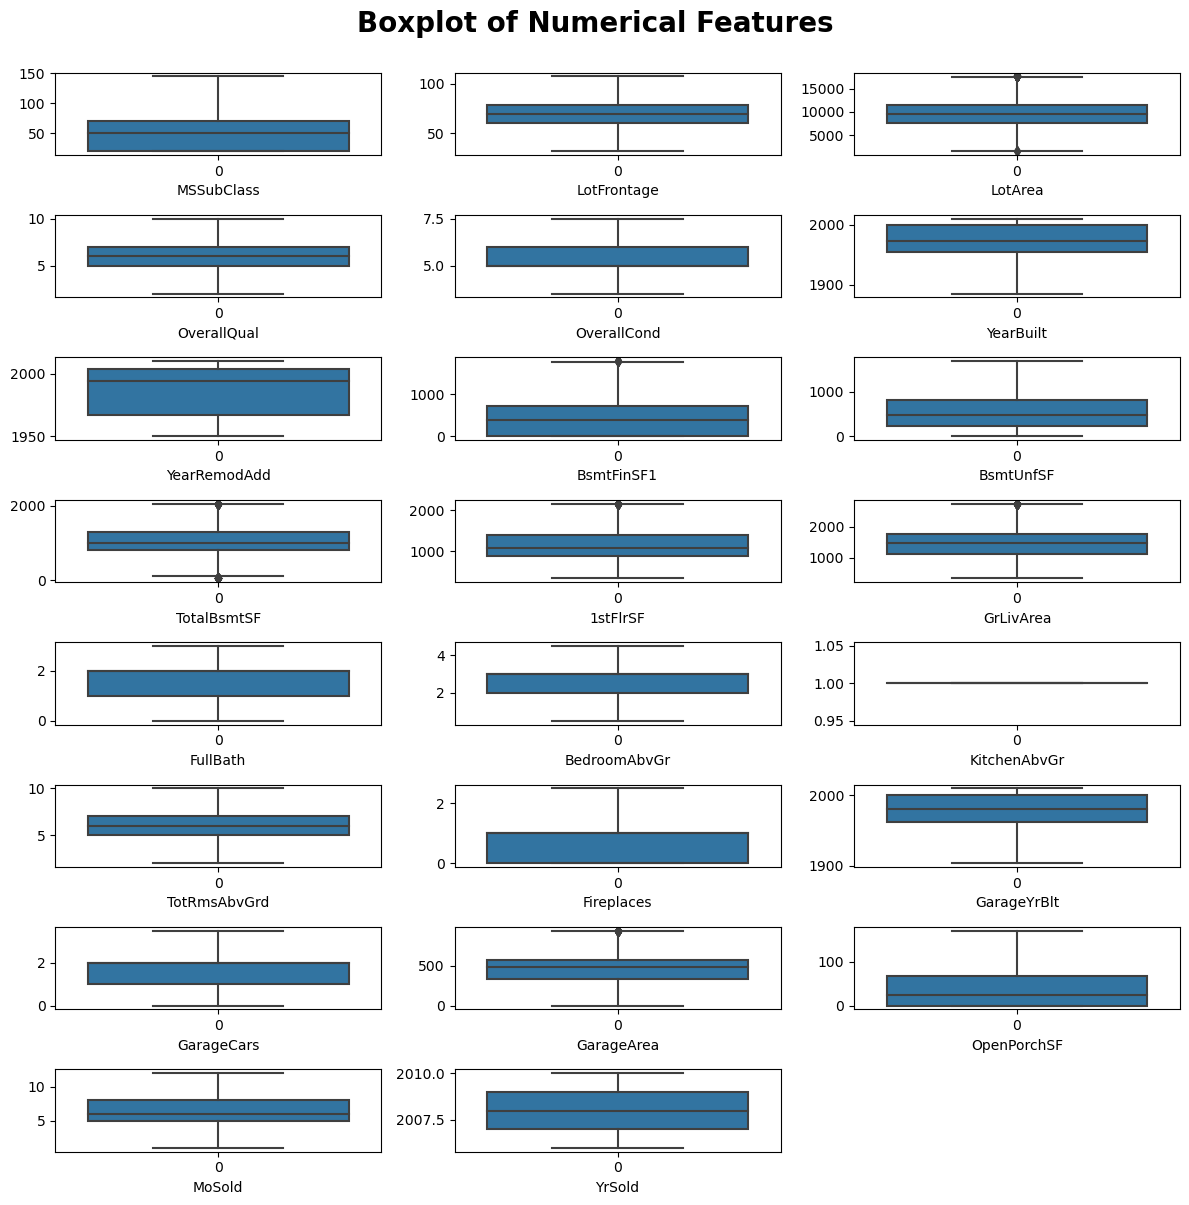

In [47]:
plt.figure(figsize=(12, 12))
plt.suptitle('Boxplot of Numerical Features', fontsize=20, fontweight='bold', y=1.)

for i in range(0, 23):
    plt.subplot(8, 3, i+1)
    sns.boxplot(data=dfNum.iloc[:, i])
    plt.xlabel(dfNum.columns[i])
    plt.tight_layout()

### Result:

- We have handled:
    - Missing Values 
    - Outliers

## Univaraite Analysis: Histogram & Density Plot:

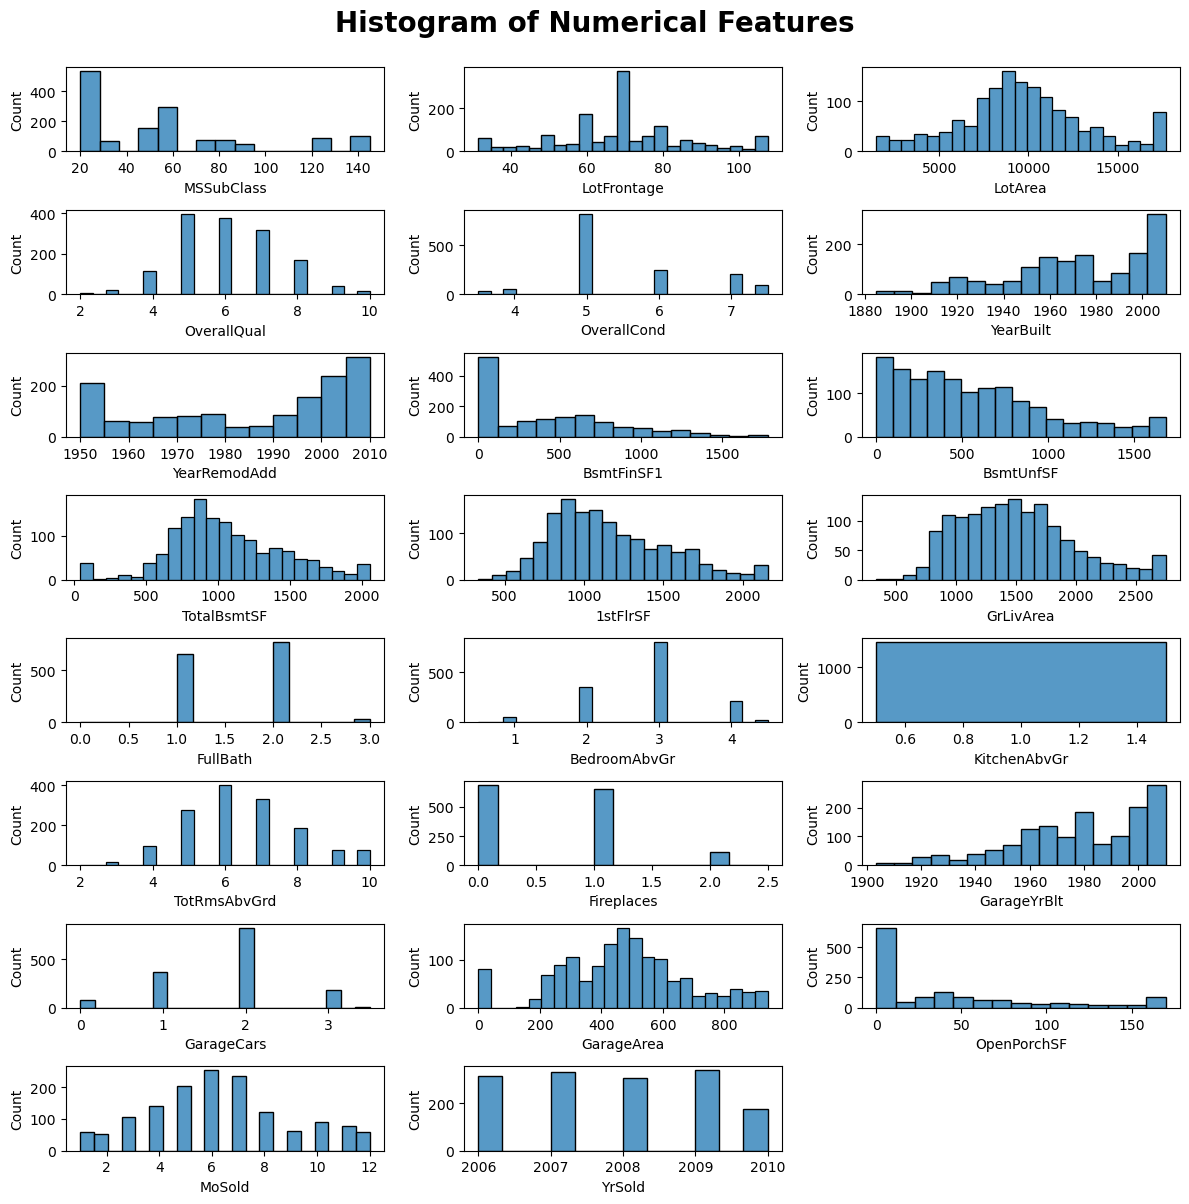

In [48]:
plt.figure(figsize=(12, 12))
plt.suptitle('Histogram of Numerical Features', fontsize=20, fontweight='bold', y=1.)

for i in range(0, 23):
    plt.subplot(8, 3, i+1)
    sns.histplot(data=dfNum.iloc[:, i])
    plt.xlabel(dfNum.columns[i])
    plt.tight_layout()

From the Box plot & the histogram it is clear that the feature "KitchenAboveGr" is a redundant feature without any change. Hence it could be dropped.

In [49]:
dfNum.drop('KitchenAbvGr', axis = 1, inplace = True)

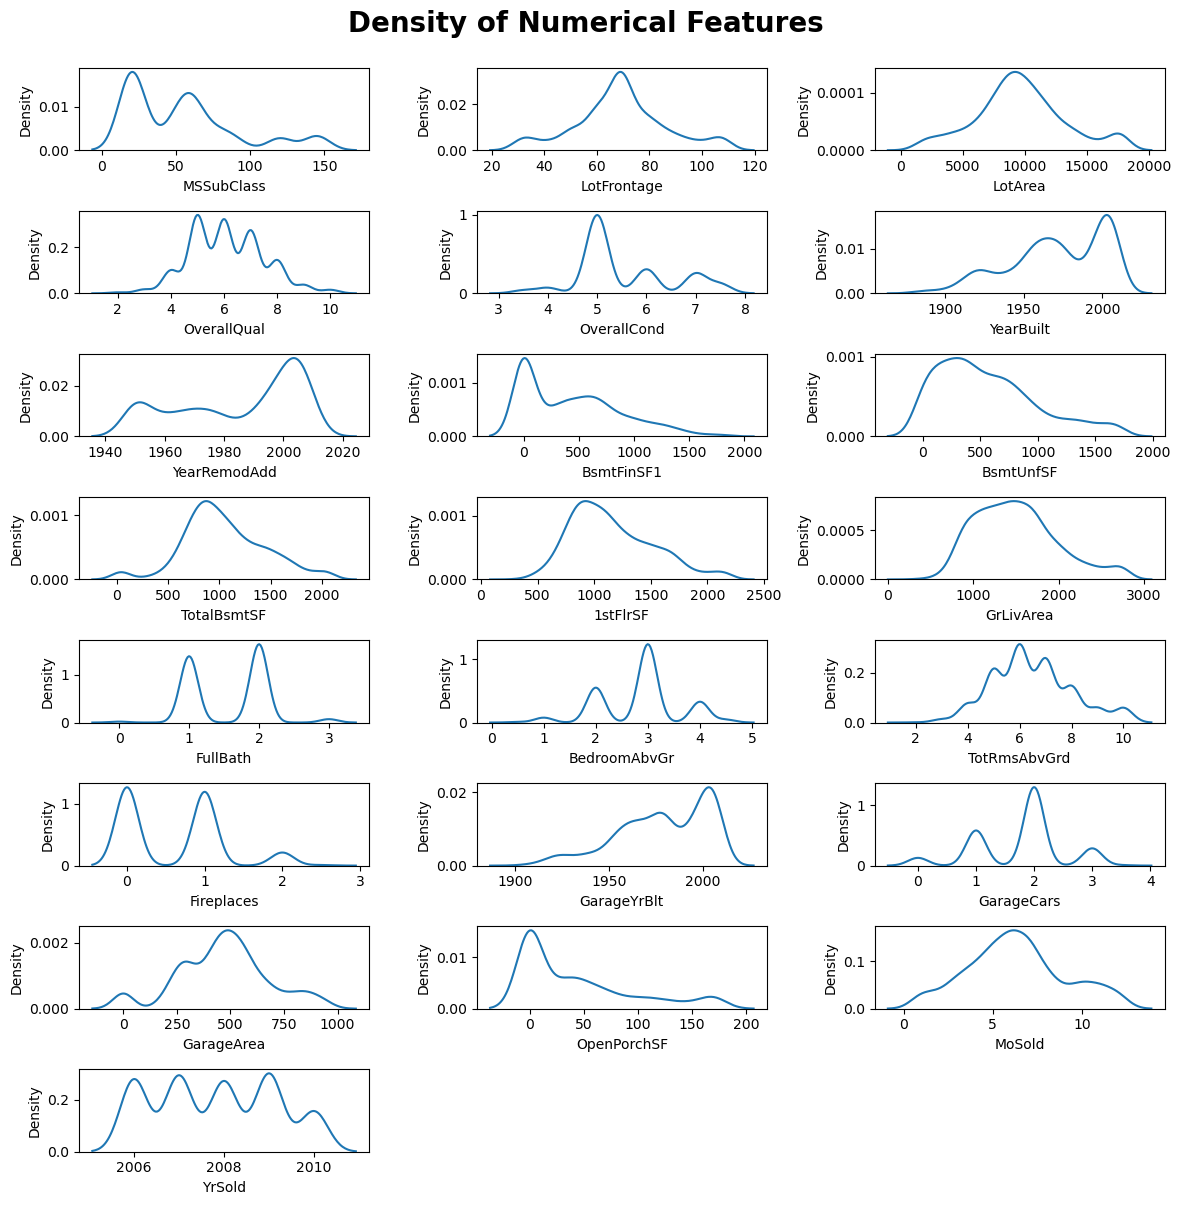

In [52]:
# Desnity Plot
plt.figure(figsize=(12, 12))
plt.suptitle('Density of Numerical Features', fontsize=20, fontweight='bold', y=1.)

for i in range(0, 22):
    plt.subplot(8, 3, i+1)
    sns.kdeplot(data=dfNum.iloc[:, i])
    plt.xlabel(dfNum.columns[i])
    plt.tight_layout()

### Univaraite Analysis: Categorical features Count Plot:

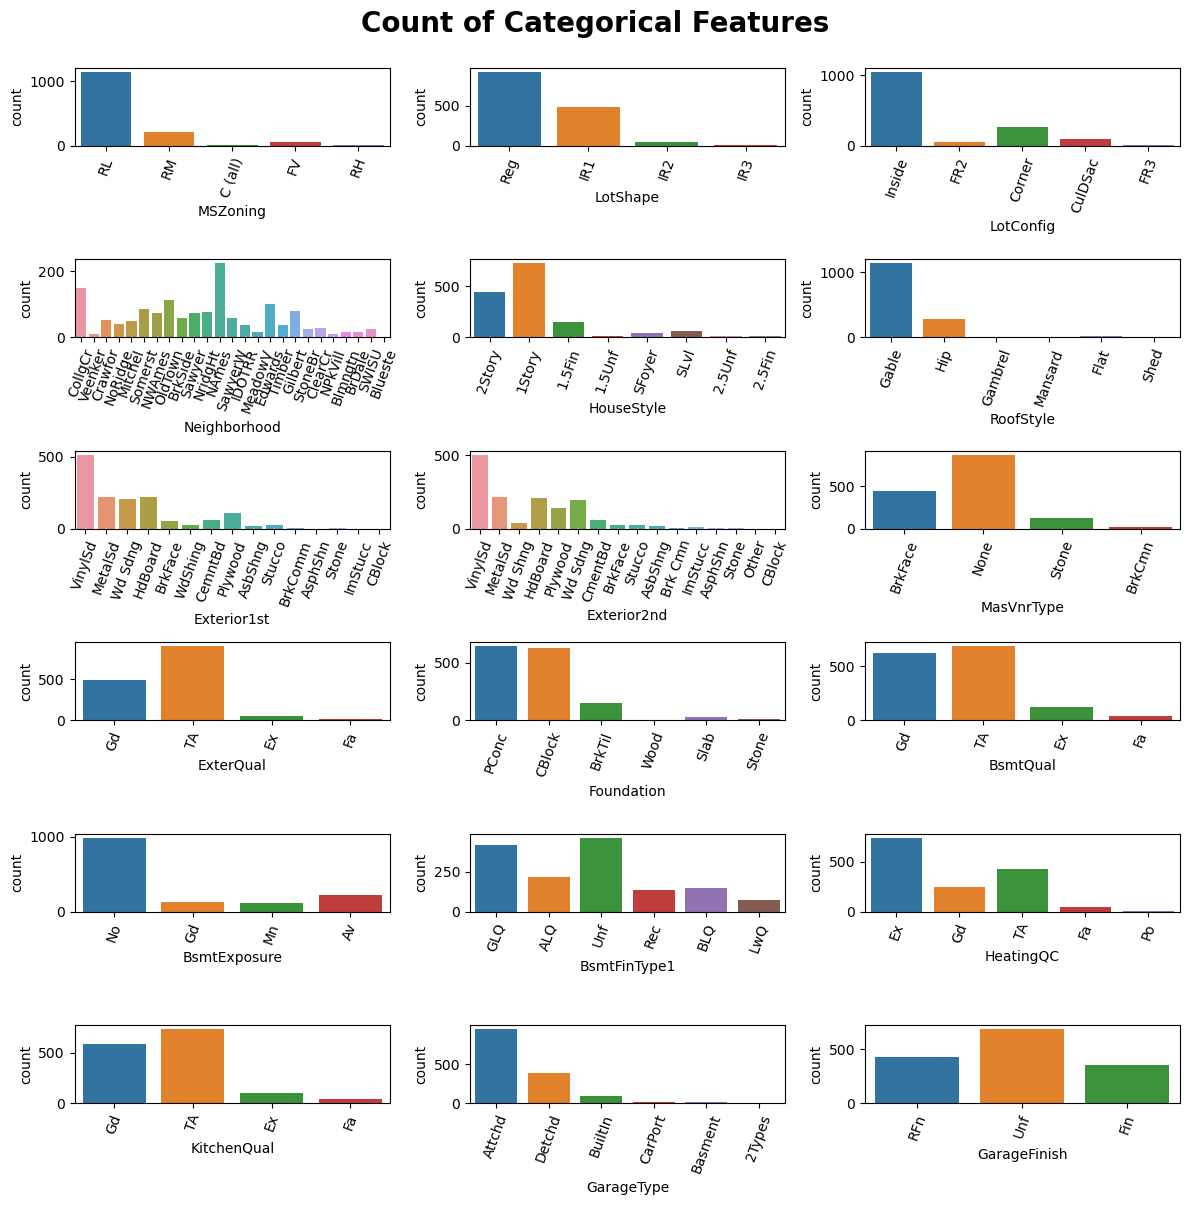

In [71]:
plt.figure(figsize=(12, 12))
plt.suptitle('Count of Categorical Features', fontsize=20, fontweight='bold', y=1.)

for i in range(0, 18):
    plt.subplot(6, 3, i+1)
    sns.countplot(x=dfCat[dfCat.columns[i]])
    plt.xlabel(dfCat.columns[i])
    plt.xticks(rotation=70)
    plt.tight_layout()

## Multivariate Analysis:

Multivariate analysis will consists of plots, correalation study.

### Multivariate Analysis Scatterplot:-

We can make scatterplot against SalePrice feature to visualize any pattern in the data. 

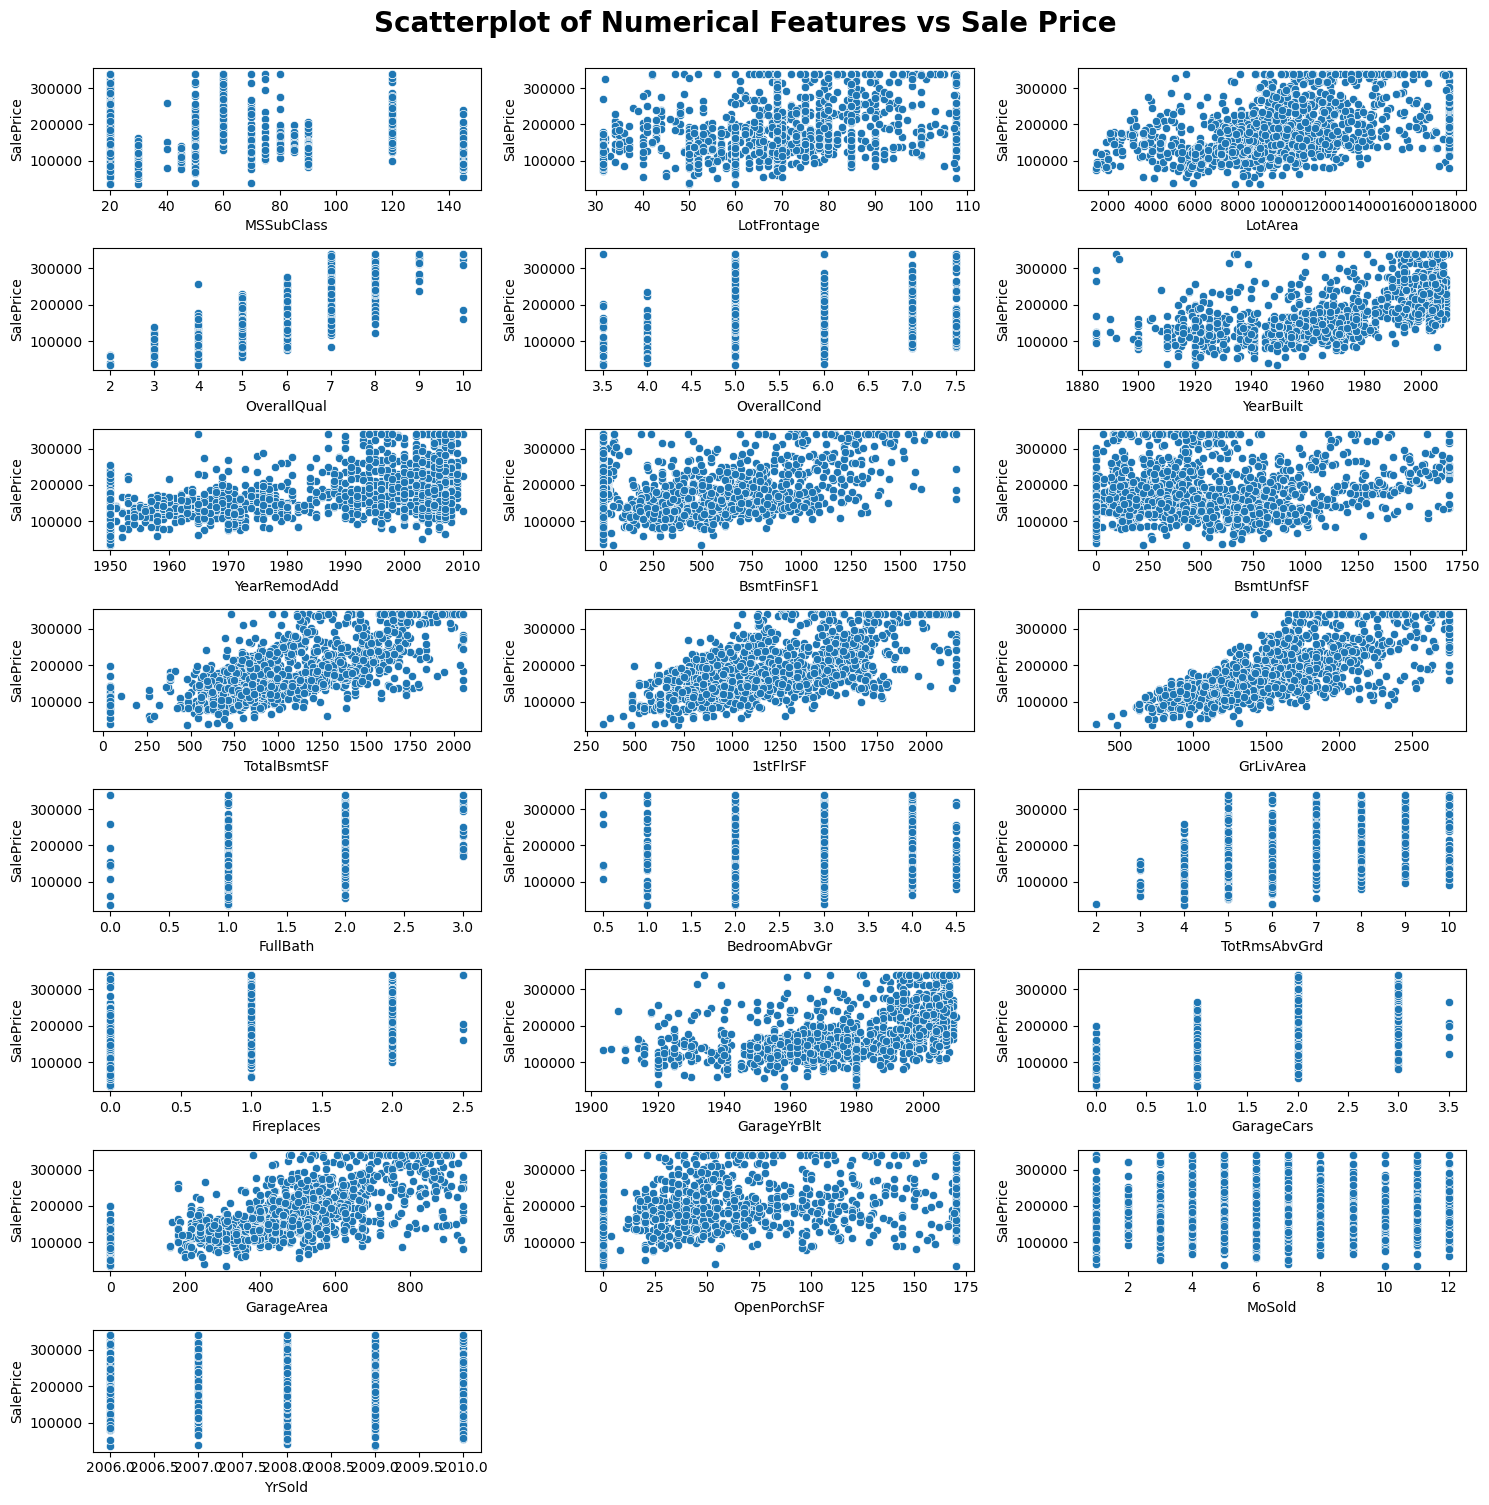

In [73]:
plt.figure(figsize=(15, 15))
plt.suptitle('Scatterplot of Numerical Features vs Sale Price', fontsize=20, fontweight='bold', y=1.)

for i in range(0, 22):
    plt.subplot(8, 3, i+1)
    sns.scatterplot(dfNum.iloc[:, i], dfNum['SalePrice'])
    plt.xlabel(dfNum.columns[i])
    plt.tight_layout()

#### Observations:
- Many variables have a coorelation with Sale Price.
- Some categorical variables have been misclassified as numerical variables.

### Co-relation & Co-linearity

In [74]:
dfNum.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,OpenPorchSF,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.399010,-0.403296,0.062802,-0.085384,0.055790,0.058578,-0.076425,-0.132790,-0.251159,...,-0.050319,0.044963,-0.029426,0.100511,-0.017853,-0.085803,0.001883,-0.003956,-0.021216,-0.061460
LotFrontage,-0.399010,1.000000,0.579298,0.244267,-0.063581,0.140115,0.077565,0.144173,0.149535,0.336424,...,0.283765,0.337543,0.225130,0.076810,0.310620,0.345132,0.147060,0.017264,0.006479,0.375851
LotArea,-0.403296,0.579298,1.000000,0.221549,-0.026495,0.065717,0.054442,0.215836,0.087040,0.361714,...,0.304621,0.394974,0.352561,0.013191,0.309743,0.344668,0.162023,0.003852,-0.036845,0.435832
OverallQual,0.062802,0.244267,0.221549,1.000000,-0.134096,0.575160,0.550829,0.229739,0.301697,0.541446,...,0.116727,0.435768,0.397375,0.516151,0.605169,0.568147,0.358426,0.069460,-0.027299,0.817679
OverallCond,-0.085384,-0.063581,-0.026495,-0.134096,1.000000,-0.399685,0.038429,-0.045413,-0.148518,-0.191759,...,0.005306,-0.081397,-0.037364,-0.334387,-0.216744,-0.177932,-0.082415,-0.009981,0.046162,-0.105923
YearBuilt,0.055790,0.140115,0.065717,0.575160,-0.399685,1.000000,0.594909,0.252815,0.145236,0.410403,...,-0.055110,0.106356,0.148134,0.779098,0.543050,0.487377,0.262130,0.012885,-0.013292,0.570315
YearRemodAdd,0.058578,0.077565,0.054442,0.550829,0.038429,0.594909,1.000000,0.126341,0.178277,0.301574,...,-0.035015,0.196675,0.111881,0.616705,0.423392,0.377292,0.280916,0.021490,0.035743,0.552051
BsmtFinSF1,-0.076425,0.144173,0.215836,0.229739,-0.045413,0.252815,0.126341,1.000000,-0.524927,0.467376,...,-0.111231,0.017377,0.246095,0.147046,0.230997,0.278350,0.088834,-0.004770,0.013967,0.387598
BsmtUnfSF,-0.132790,0.149535,0.087040,0.301697,-0.148518,0.145236,0.178277,-0.524927,1.000000,0.427677,...,0.163103,0.253440,0.049679,0.181550,0.210297,0.178505,0.150560,0.036607,-0.042775,0.216001
TotalBsmtSF,-0.251159,0.336424,0.361714,0.541446,-0.191759,0.410403,0.301574,0.467376,0.427677,1.000000,...,0.048891,0.270988,0.329964,0.320350,0.459987,0.485625,0.249656,0.028458,-0.018527,0.645226


#### Heatmap:

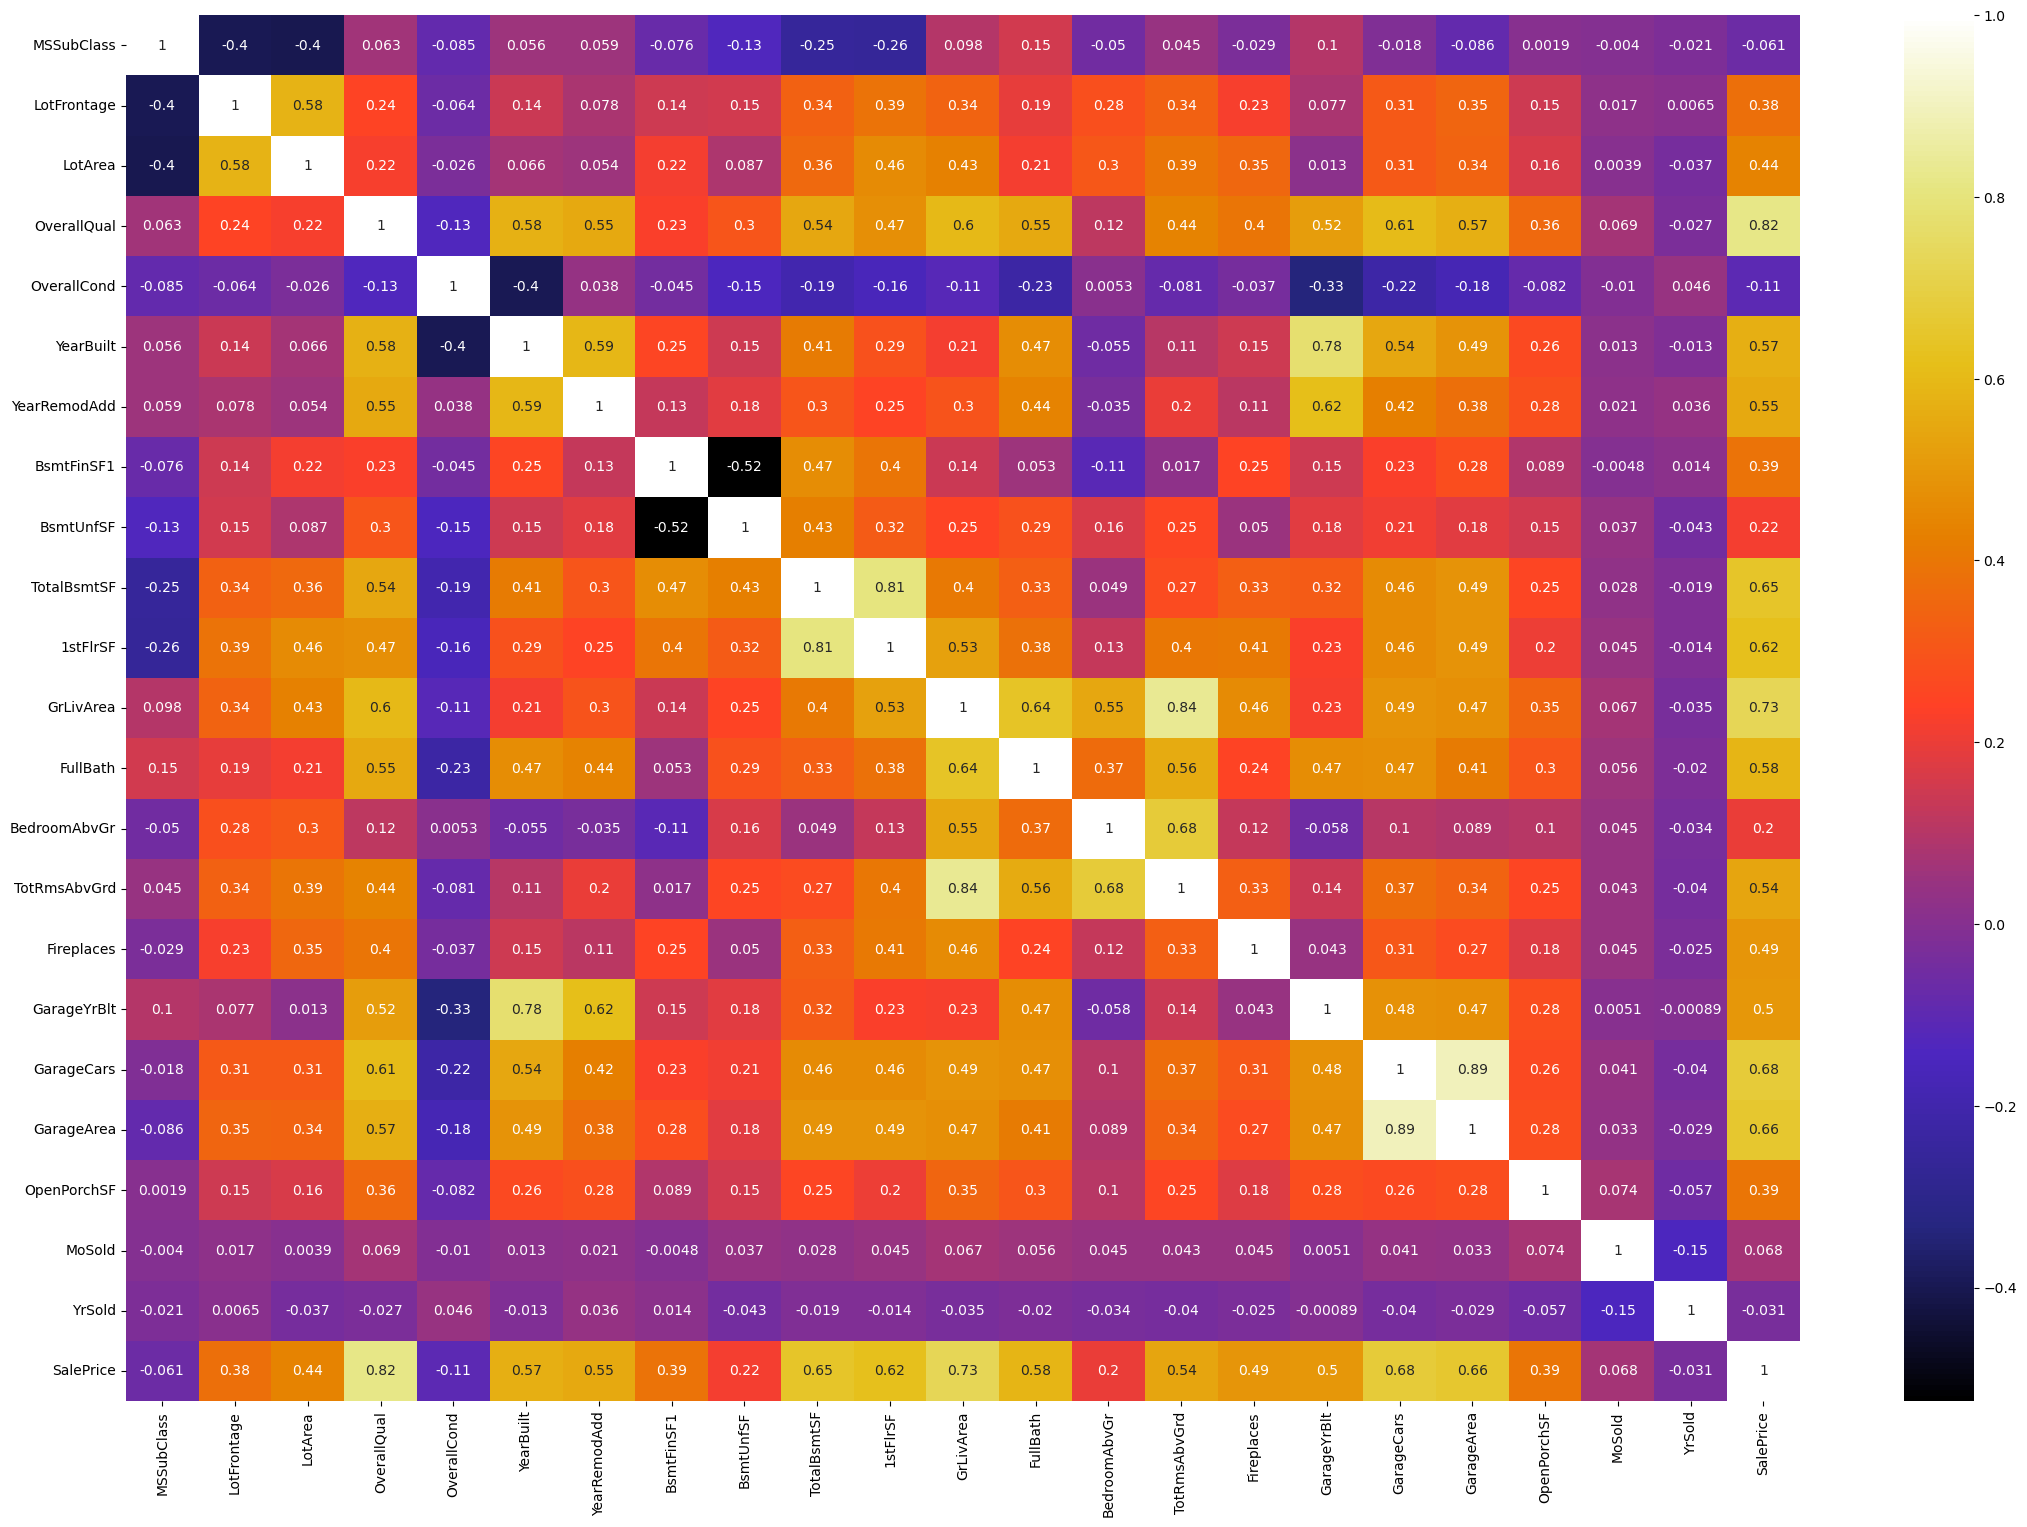

In [76]:
plt.figure(figsize = (27,18))
sns.heatmap(dfNum.corr(), cmap="CMRmap", annot=True)
plt.show()

### Observation:

Sale Price has:
- Strong +ve Correlation with:
    - OverallQual (Overall Quality)
    - GrLivArea (Gravel & Living Area)
- Weak +ve coorelation with:
    - Year Built
    - Year Remodelled
    - Total Basement Area
    - 1st Floor area
    - Full Bath
    - Garage Cars
    - Garage Area


# Chi-square Test:

To show relation ship bbetween Sale Price and the categorical features:

In [80]:
from scipy.stats import chi2_contingency
chi2_test = []
for feature in dfCat:
    if chi2_contingency(pd.crosstab(dfNum['SalePrice'], dfCat[feature]))[1] < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')
result = pd.DataFrame(data=[dfCat.columns, chi2_test]).T
result.columns = ['Column', 'Hypothesis Result']
result

,Column,Hypothesis Result
0,MSZoning,Reject Null Hypothesis
1,LotShape,Reject Null Hypothesis
2,LotConfig,Reject Null Hypothesis
3,Neighborhood,Reject Null Hypothesis
4,HouseStyle,Fail to Reject Null Hypothesis
5,RoofStyle,Fail to Reject Null Hypothesis
6,Exterior1st,Fail to Reject Null Hypothesis
7,Exterior2nd,Fail to Reject Null Hypothesis
8,MasVnrType,Reject Null Hypothesis
9,ExterQual,Reject Null Hypothesis


In [81]:
print('The categorical features of importance are:')
result[result['Hypothesis Result'] == 'Fail to Reject Null Hypothesis']['Column']

The categorical features of importance are:


4       HouseStyle
5        RoofStyle
6      Exterior1st
7      Exterior2nd
13    BsmtFinType1
14       HeatingQC
16      GarageType
Name: Column, dtype: object

## On above analysis it seems that:
- 9 numerical 
- 7 categorical
or a total of 16 features are of importance out of the 80 features. 

This is a reduction of 80% of the features for the analysis. This will surely lower the computation cost massively.

# HouseStyle:

In [82]:
dfCat['HouseStyle'].value_counts()

1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

<AxesSubplot:title={'center':'House styles in California'}, xlabel='HouseStyle', ylabel='count'>

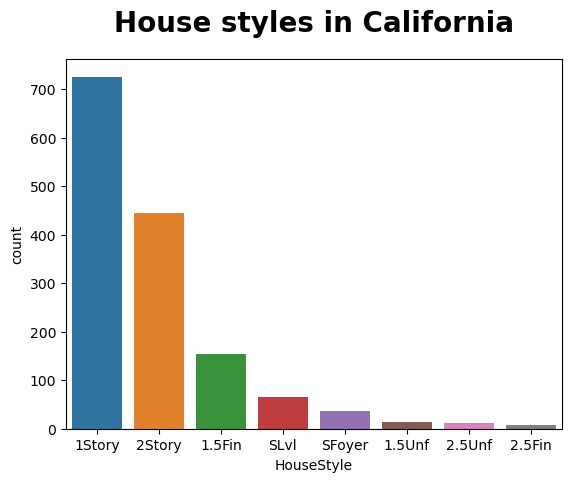

In [84]:
plt.title("House styles in California", weight="bold",fontsize=20, pad=20)
sns.countplot(x = dfCat['HouseStyle'], order = dfCat['HouseStyle'].value_counts().index)

### Roof styles

<AxesSubplot:title={'center':'Roof styles in California'}, xlabel='RoofStyle', ylabel='count'>

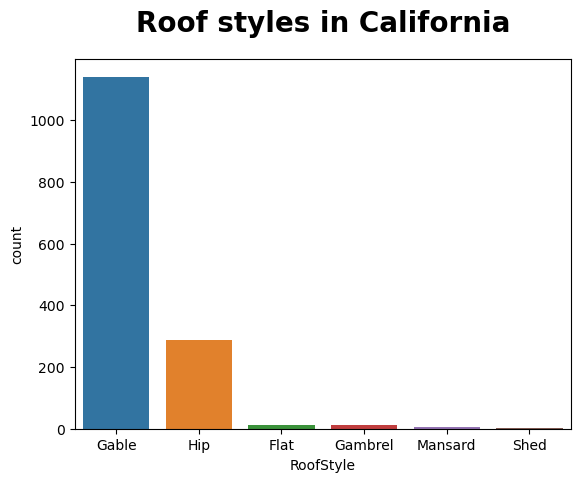

In [85]:
plt.title("Roof styles in California", weight="bold",fontsize=20, pad=20)
sns.countplot(x = dfCat['RoofStyle'], order = dfCat['RoofStyle'].value_counts().index)

### Exterior:


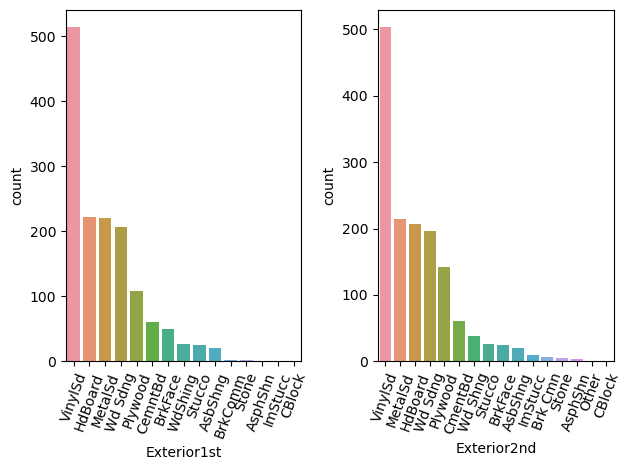

In [89]:
plt.title("Exteriors in California", weight="bold",fontsize=20, pad=20)

plt.subplot(1, 2, 1)
sns.countplot(x = dfCat['Exterior1st'], order = dfCat['Exterior1st'].value_counts().index)
plt.xlabel('Exterior1st')
plt.xticks(rotation=70)
plt.tight_layout()

plt.subplot(1, 2, 2)
sns.countplot(x = dfCat['Exterior2nd'], order = dfCat['Exterior2nd'].value_counts().index)
plt.xlabel('Exterior2nd')
plt.xticks(rotation=70)
plt.tight_layout()

#### Exterior1st & 2nd appear highly corelated and seem very similar. May be one of them could be dropped.